In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [3]:
path = "bridge_to_algebra_2006_2007_train.txt"

data = pd.read_csv(path, encoding = "ISO-8859-15",sep='\t',low_memory=False)

In [4]:
pd.set_option('display.max_columns', 500)
data.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(SubSkills),Opportunity(SubSkills)
0,1,2719gmbyqtjd,"Unit PICTURE-ALGEBRA-1, Section PICTURE-ALGEBR...",PICTALG3MU003,1,InitialQuestion,2006-10-05 13:22:59.0,2006-10-05 13:24:33.0,2006-10-05 13:24:44.0,2006-10-05 13:24:44.0,97.667,NaN,97.667,0,1,0,1,Identify larger quantity -- multiplication,1
1,2,2719gmbyqtjd,"Unit PICTURE-ALGEBRA-1, Section PICTURE-ALGEBR...",PICTALG3MU003,1,Label:1,2006-10-05 13:24:33.0,2006-10-05 13:24:44.0,2006-10-05 13:24:44.0,2006-10-05 13:24:44.0,3.667,3.667,NaN,1,0,0,1,NaN,NaN
2,3,2719gmbyqtjd,"Unit PICTURE-ALGEBRA-1, Section PICTURE-ALGEBR...",PICTALG3MU003,1,Label:2,2006-10-05 13:24:33.0,2006-10-05 13:24:44.0,2006-10-05 13:24:44.0,2006-10-05 13:24:44.0,3.667,3.667,NaN,1,0,0,1,NaN,NaN
3,4,2719gmbyqtjd,"Unit PICTURE-ALGEBRA-1, Section PICTURE-ALGEBR...",PICTALG3MU003,1,Bar2,2006-10-05 13:24:44.0,2006-10-05 13:25:16.0,2006-10-05 13:25:16.0,2006-10-05 13:25:16.0,32.000,32.000,NaN,1,0,0,1,Draw larger bar -- multiplication,1
4,5,2719gmbyqtjd,"Unit PICTURE-ALGEBRA-1, Section PICTURE-ALGEBR...",PICTALG3MU003,1,Bar1,2006-10-05 13:25:16.0,2006-10-05 13:25:21.0,2006-10-05 13:25:21.0,2006-10-05 13:25:21.0,5.000,5.000,NaN,1,0,0,1,Draw smaller bar -- multiplication,1


In [5]:
data.columns = data.columns.str.replace(' ', '_')
data.head()

,Row,Anon_Student_Id,Problem_Hierarchy,Problem_Name,Problem_View,Step_Name,Step_Start_Time,First_Transaction_Time,Correct_Transaction_Time,Step_End_Time,Step_Duration_(sec),Correct_Step_Duration_(sec),Error_Step_Duration_(sec),Correct_First_Attempt,Incorrects,Hints,Corrects,KC(SubSkills),Opportunity(SubSkills)
0,1,2719gmbyqtjd,"Unit PICTURE-ALGEBRA-1, Section PICTURE-ALGEBR...",PICTALG3MU003,1,InitialQuestion,2006-10-05 13:22:59.0,2006-10-05 13:24:33.0,2006-10-05 13:24:44.0,2006-10-05 13:24:44.0,97.667,NaN,97.667,0,1,0,1,Identify larger quantity -- multiplication,1
1,2,2719gmbyqtjd,"Unit PICTURE-ALGEBRA-1, Section PICTURE-ALGEBR...",PICTALG3MU003,1,Label:1,2006-10-05 13:24:33.0,2006-10-05 13:24:44.0,2006-10-05 13:24:44.0,2006-10-05 13:24:44.0,3.667,3.667,NaN,1,0,0,1,NaN,NaN
2,3,2719gmbyqtjd,"Unit PICTURE-ALGEBRA-1, Section PICTURE-ALGEBR...",PICTALG3MU003,1,Label:2,2006-10-05 13:24:33.0,2006-10-05 13:24:44.0,2006-10-05 13:24:44.0,2006-10-05 13:24:44.0,3.667,3.667,NaN,1,0,0,1,NaN,NaN
3,4,2719gmbyqtjd,"Unit PICTURE-ALGEBRA-1, Section PICTURE-ALGEBR...",PICTALG3MU003,1,Bar2,2006-10-05 13:24:44.0,2006-10-05 13:25:16.0,2006-10-05 13:25:16.0,2006-10-05 13:25:16.0,32.000,32.000,NaN,1,0,0,1,Draw larger bar -- multiplication,1
4,5,2719gmbyqtjd,"Unit PICTURE-ALGEBRA-1, Section PICTURE-ALGEBR...",PICTALG3MU003,1,Bar1,2006-10-05 13:25:16.0,2006-10-05 13:25:21.0,2006-10-05 13:25:21.0,2006-10-05 13:25:21.0,5.000,5.000,NaN,1,0,0,1,Draw smaller bar -- multiplication,1


In [6]:
data.describe()

,Row,Problem_View,Step_Duration_(sec),Correct_Step_Duration_(sec),Error_Step_Duration_(sec),Correct_First_Attempt,Incorrects,Hints,Corrects
count,3.679199e+06,3.679199e+06,3.678572e+06,3.267341e+06,411231.000000,3.679199e+06,3.679199e+06,3.679199e+06,3.679199e+06
mean,2.462101e+06,1.053411e+00,9.322700e+00,6.838272e+00,29.062156,8.881727e-01,1.605966e-01,2.966216e-02,1.001409e+00
std,1.419768e+06,2.529529e-01,2.583300e+01,1.831233e+01,53.539827,3.151539e-01,7.836426e-01,2.338755e-01,2.013097e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.234682e+06,1.000000e+00,2.000000e+00,2.000000e+00,6.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.465521e+06,1.000000e+00,3.000000e+00,3.000000e+00,13.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,3.691370e+06,1.000000e+00,7.000000e+00,6.000000e+00,31.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,4.920096e+06,1.000000e+01,2.098000e+03,1.170000e+03,2098.000000,1.000000e+00,1.220000e+02,3.300000e+01,2.800000e+01


In [7]:
print("The number of records: "+ str(len(data['Row'].unique())))

The number of records: 3679199


In [8]:
print('Part of missing values for every column')
print(data.isnull().sum() / len(data))

Part of missing values for every column
Row                            0.000000
Anon_Student_Id                0.000000
Problem_Hierarchy              0.000000
Problem_Name                   0.000000
Problem_View                   0.000000
Step_Name                      0.000000
Step_Start_Time                0.000170
First_Transaction_Time         0.000000
Correct_Transaction_Time       0.014382
Step_End_Time                  0.000000
Step_Duration_(sec)            0.000170
Correct_Step_Duration_(sec)    0.111942
Error_Step_Duration_(sec)      0.888228
Correct_First_Attempt          0.000000
Incorrects                     0.000000
Hints                          0.000000
Corrects                       0.000000
KC(SubSkills)                  0.506013
Opportunity(SubSkills)         0.506013
dtype: float64


In [9]:
len(data.Anon_Student_Id.unique())

1146

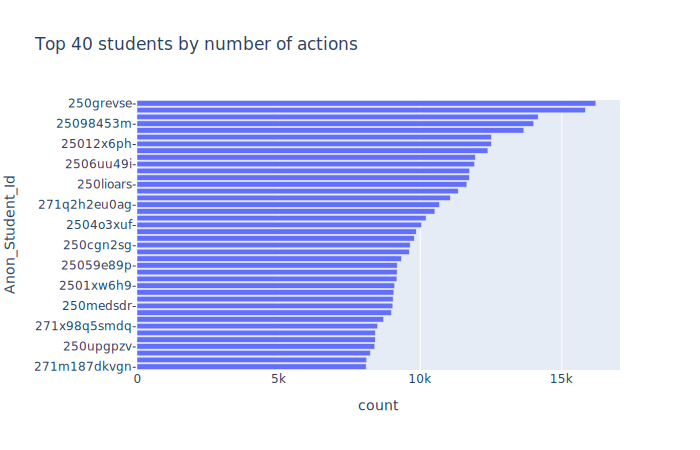

In [10]:
ds = data['Anon_Student_Id'].value_counts().reset_index()

ds.columns = [
    'Anon_Student_Id',
    'count'
]

ds['Anon_Student_Id'] = ds['Anon_Student_Id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'Anon_Student_Id',
    orientation='h',
    title='Top 40 students by number of actions'
)

fig.show("svg")

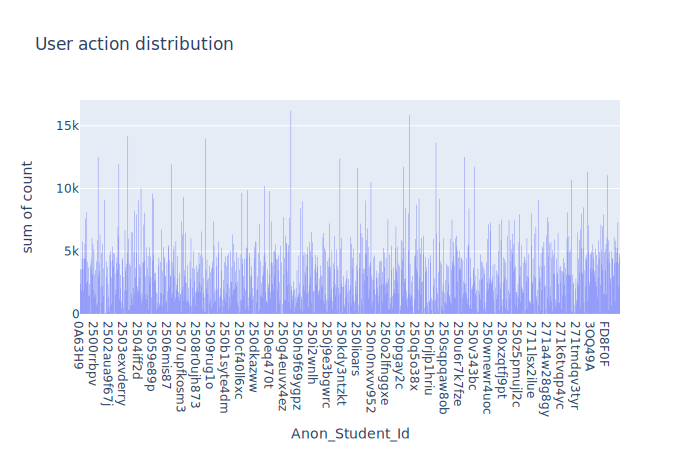

In [11]:
ds = data['Anon_Student_Id'].value_counts().reset_index()

ds.columns = [
    'Anon_Student_Id',
    'count'
]

ds = ds.sort_values('Anon_Student_Id')

fig = px.histogram(
    ds,
    x = 'Anon_Student_Id',
    y = 'count',
    title = 'User action distribution'
)

fig.show("svg")

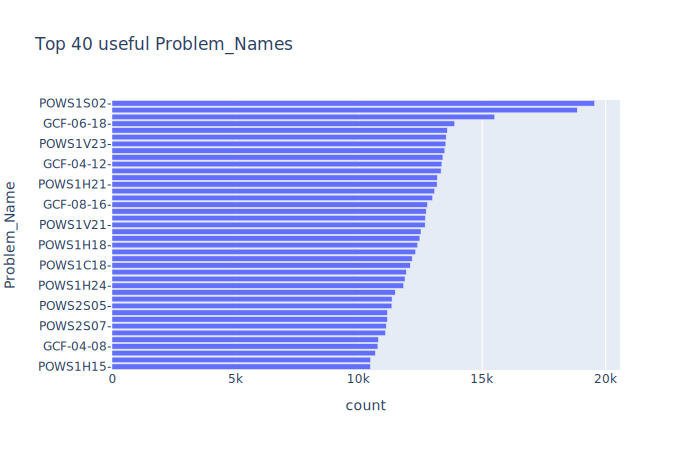

In [12]:
ds = data['Problem_Name'].value_counts().reset_index()

ds.columns = [
    'Problem_Name',
    'count'
]

ds['Problem_Name'] = ds['Problem_Name'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'Problem_Name',
    orientation = 'h',
    title = 'Top 40 useful Problem_Names'
)

fig.show("svg")

In [13]:
ds = data['Problem_Name'].value_counts().reset_index()

ds.columns = [
    'Problem_Name', 
    'count'
]

ds = ds.sort_values('Problem_Name')

fig = px.histogram(
    ds, 
    x='Problem_Name', 
    y='count', 
    title='Problem_Name action distribution'
)

fig.show("svg")

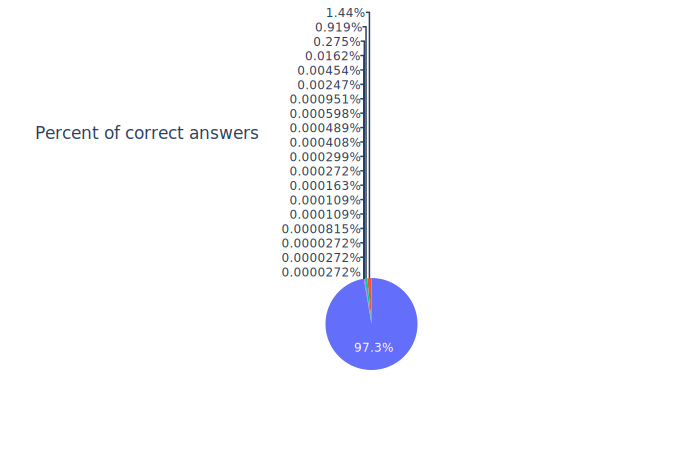

In [16]:
ds = data['Corrects'].value_counts().reset_index()

ds.columns = [
    'Corrects',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
#     names = ['wrong', 'right'],
    values = 'percent',
    title = 'Percent of correct answers'    
)


fig.show("svg")

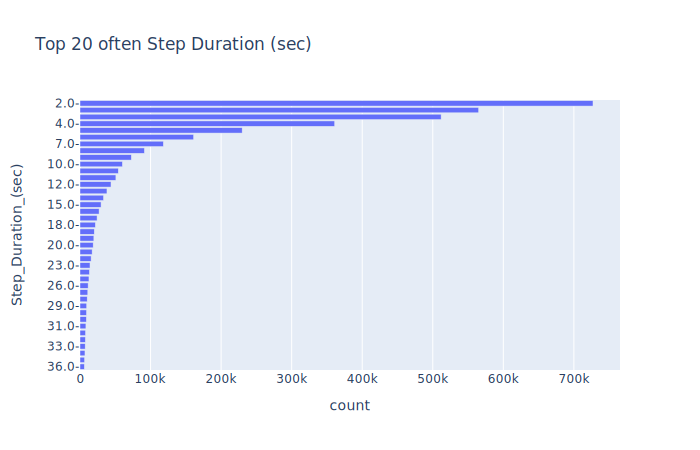

In [17]:
ds = data['Step_Duration_(sec)'].value_counts().reset_index()

ds.columns = [
    'Step_Duration_(sec)',
    'count'
]

ds['Step_Duration_(sec)'] = ds['Step_Duration_(sec)'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'Step_Duration_(sec)',
    orientation = 'h',
    title = 'Top 20 often Step Duration (sec)'
)

fig.show("svg")

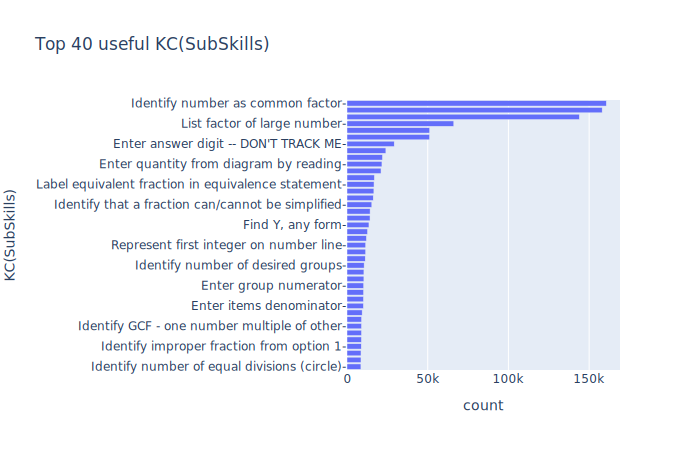

In [19]:
ds = data['KC(SubSkills)'].dropna() # There are less NaNs in 'skill_id' column than 'skill_name' column.
ds = ds.value_counts().reset_index()

ds.columns = [
    'KC(SubSkills)',
    'count'
]

ds['KC(SubSkills)'] = ds['KC(SubSkills)'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'KC(SubSkills)',
    orientation = 'h',
    title = 'Top 40 useful KC(SubSkills)'
)


fig.show("svg")